In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/joselynemera/Desktop/titanic/train.csv')

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_Range'],
      dtype='object')

In [6]:
# See if survived had similar characteristics
df_survived = df[df["Survived"]==1]

In [7]:
df_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [8]:
df_survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It looks like the average age of those who survived was 28 and the average fare was 48

In [10]:
# Find the overall counts of male and female
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
# See the counts of male and female in the survived dataset - this looks like a high-impact factor
df_survived['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

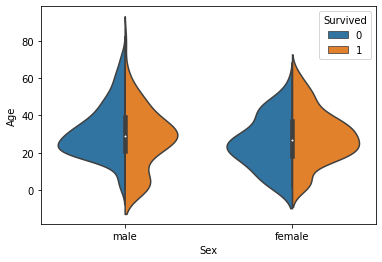

In [15]:
# see the trends in sex and age in those who survived and didn't survive
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = df, split = True)

It looks like male and female children survival rates were both good for children. It is also good for women ages 20-40

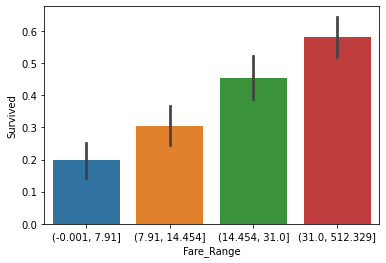

In [20]:
# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived', data = df)

This shows that more survivors come from the higher fare ranges

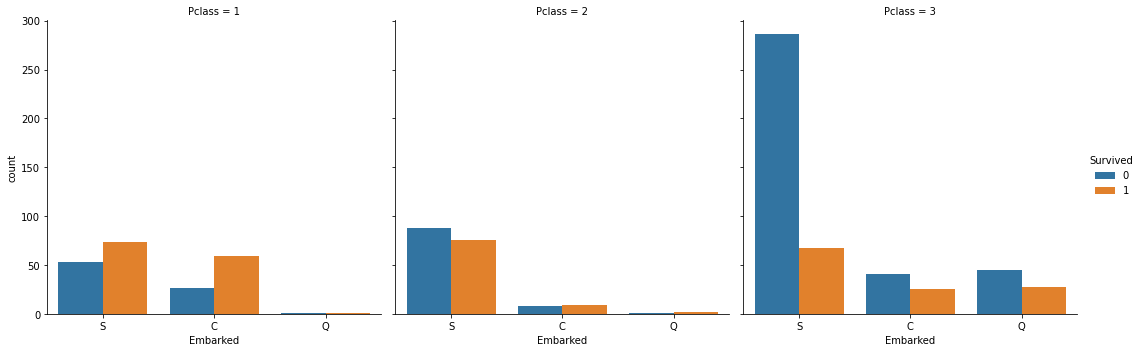

In [22]:
# Show the number of people who embarked at each of these cities - split by the ticket class - and compare who
# survived and who didn't
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df)

It looks like most people came from S - many of them were first and second class and overall S had the most survived. 

In [ ]:
# We can use the Pclass, sex, age, fare, and embarked columns
# 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
 #      'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_Range']

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [52]:
df_model = df.drop(columns=['SibSp','Parch','Ticket','Cabin','Fare','Name'])

In [53]:
df_model

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Fare_Range
0,1,0,3,male,22.0,S,"(-0.001, 7.91]"
1,2,1,1,female,38.0,C,"(31.0, 512.329]"
2,3,1,3,female,26.0,S,"(7.91, 14.454]"
3,4,1,1,female,35.0,S,"(31.0, 512.329]"
4,5,0,3,male,35.0,S,"(7.91, 14.454]"
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,S,"(7.91, 14.454]"
887,888,1,1,female,19.0,S,"(14.454, 31.0]"
888,889,0,3,female,NaN,S,"(14.454, 31.0]"
889,890,1,1,male,26.0,C,"(14.454, 31.0]"


In [54]:
x_columns = ['Pclass','Sex','Age','Embarked','Fare_Range']
X = df_model[x_columns]
y = df_model['Survived']

In [55]:
# Fill missing values for categorical columns
categorical_columns = ['Sex','Embarked','Fare_Range']
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])


<ipython-input-55-36a9cc688c91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])
/Users/joselynemera/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [60]:
# Impute missing values for numerical columns
numerical_columns = ['Pclass', 'Age']
numerical_imputer = SimpleImputer(strategy='mean')
X[numerical_columns] = numerical_imputer.fit_transform(X[numerical_columns])

<ipython-input-60-f8ea57d11f2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_columns] = numerical_imputer.fit_transform(X[numerical_columns])
/Users/joselynemera/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [61]:
# Perform one-hot encoding for categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]), columns=encoder.get_feature_names(categorical_columns))
X_final = pd.concat([X.drop(categorical_columns, axis=1), X_encoded], axis=1)

In [62]:
X_final

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S,"Fare_Range_(7.91, 14.454]","Fare_Range_(14.454, 31.0]","Fare_Range_(31.0, 512.329]"
0,3.0,22.000000,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,38.000000,0.0,0.0,0.0,0.0,0.0,1.0
2,3.0,26.000000,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,35.000000,0.0,0.0,1.0,0.0,0.0,1.0
4,3.0,35.000000,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
886,2.0,27.000000,1.0,0.0,1.0,1.0,0.0,0.0
887,1.0,19.000000,0.0,0.0,1.0,0.0,1.0,0.0
888,3.0,29.699118,0.0,0.0,1.0,0.0,1.0,0.0
889,1.0,26.000000,1.0,0.0,0.0,0.0,1.0,0.0


In [63]:
# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_final, y)

RandomForestClassifier(random_state=42)

In [66]:
# Make predictions on the same data
y_pred = model.predict(X_final)

In [71]:
# Evaluate the model's performance
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       549
           1       0.95      0.87      0.91       342

    accuracy                           0.93       891
   macro avg       0.94      0.92      0.93       891
weighted avg       0.93      0.93      0.93       891

[[532  17]
 [ 43 299]]


## Use the test data provided to make predictions with this model

In [106]:
test_data = pd.read_csv('/Users/joselynemera/Desktop/titanic/test.csv')

In [107]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [108]:
# Divide Fare into 4 bins
test_data['Fare_Range'] = pd.qcut(test_data['Fare'], 4)

In [109]:
test_data = test_data.drop(columns=['SibSp','Parch','Ticket','Cabin','Fare','Name'])

In [111]:
x_columns = ['Pclass','Sex','Age','Embarked','Fare_Range']
X_test = test_data[x_columns]
#y_test = test_data['Survived']

In [112]:
# Fill missing values for categorical columns
categorical_columns = ['Sex','Embarked','Fare_Range']
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_test[categorical_columns] = categorical_imputer.fit_transform(X_test[categorical_columns])

<ipython-input-112-d3527eba40d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[categorical_columns] = categorical_imputer.fit_transform(X_test[categorical_columns])
/Users/joselynemera/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [113]:
# Impute missing values for numerical columns
numerical_columns = ['Pclass', 'Age']
numerical_imputer = SimpleImputer(strategy='mean')
X_test[numerical_columns] = numerical_imputer.fit_transform(X_test[numerical_columns])

<ipython-input-113-ba214912ba06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_columns] = numerical_imputer.fit_transform(X_test[numerical_columns])
/Users/joselynemera/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [116]:
# Perform one-hot encoding for categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_test_encoded = pd.DataFrame(encoder.fit_transform(X_test[categorical_columns]), columns=encoder.get_feature_names(categorical_columns))
X_test_final = pd.concat([X_test.drop(categorical_columns, axis=1), X_test_encoded], axis=1)

In [117]:
y_pred = model.predict(X_test_final)

In [121]:
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

In [122]:
result_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred})

In [123]:
result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [126]:
result_df.to_csv('/Users/joselynemera/Desktop/titanic/titanic_results.csv', index=False)